In [1]:
import re
import pandas as pd
from pathlib import Path
from solar_rs import element_list
from starfit.autils.abusets import SolAbu
from starfit import Single
sun = SolAbu('sollo09.dat', silent=True)
from solar_rs import symbol_list

ModuleNotFoundError: No module named 'starfit'

In [2]:
# datpath = Path('/home/jiangrz/hdd23/Data/rproc/J0804+5740.csv')
# newdata = pd.read_csv(datpath)
# newdata = newdata.drop([8, 10, 13, 16])
# feh = newdata.loc[15, 'log_e(X)'] - sun.log_eps('Fe')
# olddata = pd.read_csv('/home/jiangrz/hdd23/Data/rproc/XFe.csv')
# columns = olddata.columns

In [3]:
# df_newdata = pd.DataFrame(columns=columns)
# df_newdata.loc[0, 'objname'] = 'J0804+5740'
# pattern = r'(\w+)(\sI+)?'
el, logeps, elogeps = [], [], []
# for _, row in newdata.iterrows():
#     _colname = row['Species']
#     _logeps = row['log_e(X)']
#     _elogeps = row['Sigma_tot']
#     re_group =  re.match(pattern, _colname).groups()
#     element = re_group[0]
#     if element == 'CH':
#         element = 'C'
#     df_newdata.loc[0, element] = _logeps
#     df_newdata.loc[0, 'e%s'%element] = _elogeps
#     if element == 'Fe':
#         df_newdata.loc[0, 'FeH'] = feh
#     _xfe = _logeps - sun.log_eps(element) - feh
#     _exfe = _elogeps
#     el.append(element)
#     xfe.append(_xfe)
#     exfe.append(_exfe)
# df_newdata.to_csv('J0804+5740.csv', index=False)
df_newdata = pd.read_csv('J0804+5740.csv')
df_col = df_newdata.columns
for symbol in symbol_list:
    if symbol in df_col:
        el.append(symbol)
        logeps.append(df_newdata.loc[0, symbol])
        elogeps.append(df_newdata.loc[0, 'e'+symbol])

starpath = 'J0804+5740.dat'
with open(starpath, 'w') as file:
    file.write('10002\n')
    file.write('%s\n'%('J0804+5740'))
    file.write('%s\n'%(''))
    file.write('%s\n'%(''))
    file.write('1\n')
    file.write('\n')
    file.write('%s\n'%(len(logeps)))
    for _el, _logeps, _elogeps in zip(el, logeps, elogeps):
        el_line = '%-3s  %5.2f  %5.2f'%(_el, _logeps, _elogeps)
        file.write('%s\n'%(el_line))
    file.write('As09')

In [4]:
from util_plot import AbundPlot
aplt = AbundPlot(datafile='J0804+5740.csv')
star_name = 'J0804+5740'
aplt.load_star(star_name)
fig = aplt.plot()

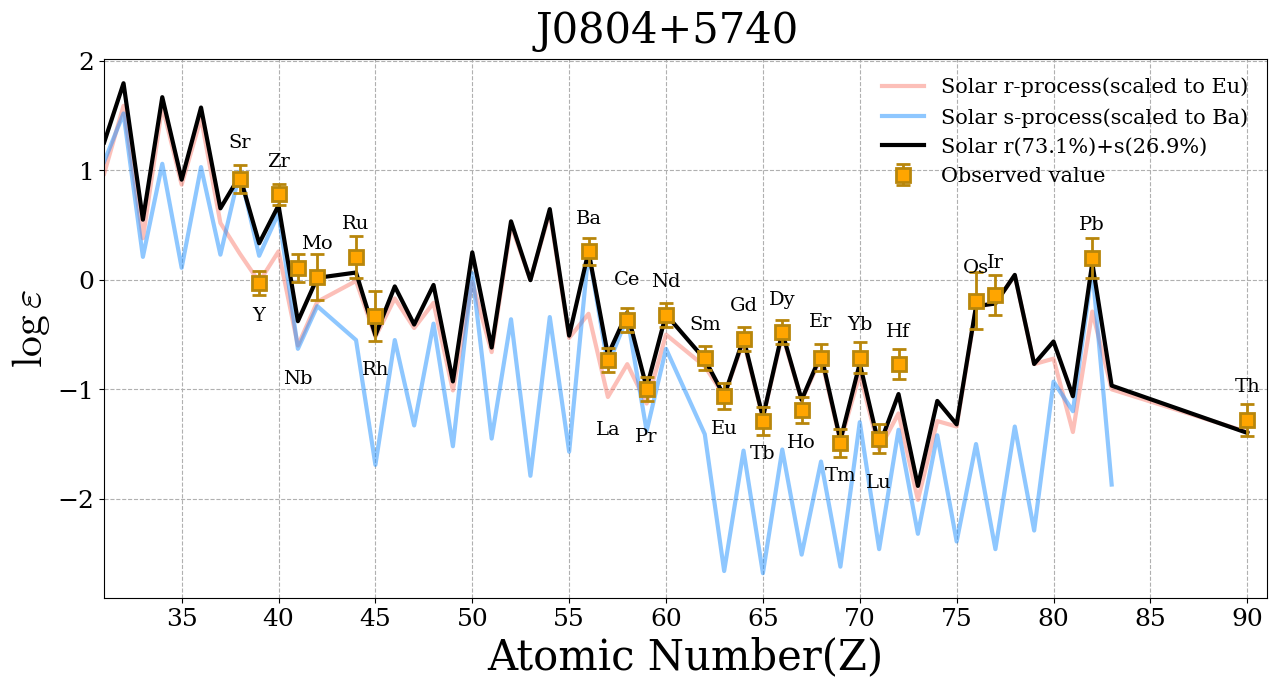

In [5]:
fig

In [6]:
import numpy as np
print(2.953 + np.log10(0.912))
print(2.953 + np.log10(0.083))

2.912994838328416
1.8720780923760738


In [7]:
print(3.07 + np.log10(0.730))
print(3.150 + np.log10(0.270))

2.9333228601204557
2.5813637641589873


[2.57538492e-02 2.60888094e-03 3.86438744e-13 3.25757767e-15
 5.26696601e-13]
[-1.44336788 -1.41471688 -3.5686744  -3.67850878 -2.95698477]


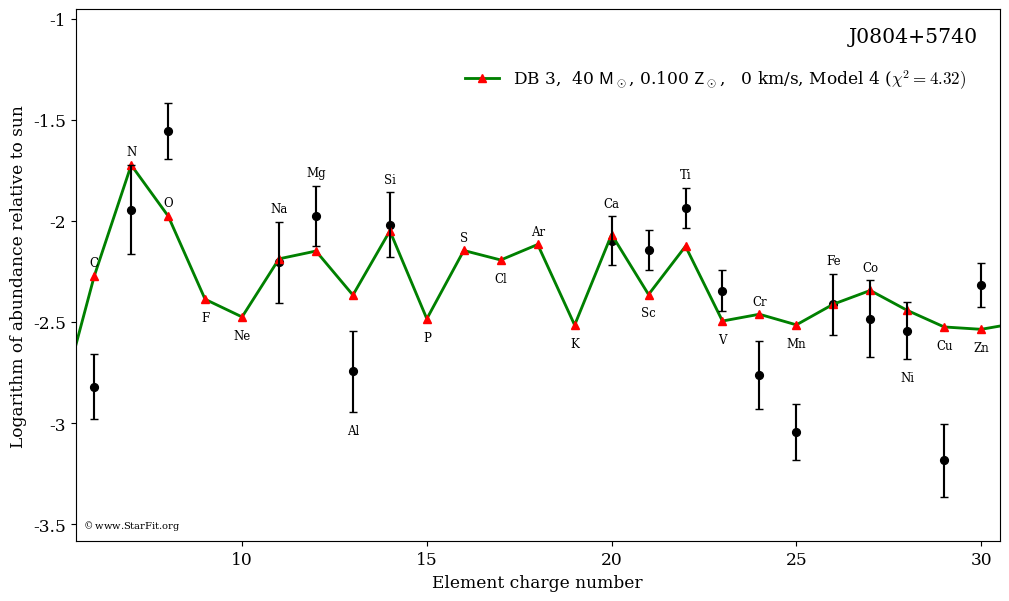

In [11]:
sing = Single(
    'J0804+5740.dat', 
    db=[
        'znuc2012.Ye.star.el.y.stardb.gz', 
        'znuc2012.S4.star.el.y.stardb.gz', 
        'znuc_lc12.el.y.stardb.xz', 
        'nuc.lc18.star.el.y.stardb.xz', 
        'he2sn.hexnuc.star.el.y.stardb.xz'
    ], 
    z_min=6, z_max=30, 
    # z_exclude=[19, 21, 24, 29, 30],
    silent=True
)
sing.plot();